In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

iris = pd.read_csv('../final_csv/reduced_iris.csv')
raisin = pd.read_csv('../final_csv/reduced_raisin.csv')

In [2]:
num_columns = iris.shape[1]
print("Number of columns:", num_columns)
iris = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
raisin = raisin[['majoraxislength', 'perimeter', 'convexarea', 'area', 'class']]
iris['Species'] = iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

iris_columns = iris.columns
raisin_columns = raisin.columns

accuracy_overall_knn = []
accuracy_overall_mlp = []
data = iris.copy()

Number of columns: 5


In [3]:
def calculate_stats_knn(data):
    X = data.drop('Species', axis=1)
    Y = data['Species'].astype('int')

    n_splits = 10
    skf = StratifiedKFold(n_splits, shuffle=True, random_state=10)
    average_accuracy=0

    for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
        X_train = X.take(train_index)
        y_train = Y.take(train_index)
        X_test = X.take(test_index)
        y_test = Y.take(test_index)

        knn_classifier = MLPClassifier(max_iter=500)
        knn_classifier.fit(X_train, y_train)

        y_pred = knn_classifier.predict(X_test)

        accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
        #print("Accuracy:", accuracy)
        average_accuracy = average_accuracy + accuracy
        cross_val_scores = cross_val_score(knn_classifier, X, Y, cv=4)
        cross_val_scores = [round(score, 2) for score in cross_val_scores]

        #print("Cross-Validation Scores:", cross_val_scores)

    average_accuracy = average_accuracy/n_splits

    return average_accuracy

In [4]:
def calculate_stats_mlp(data):
    X = data.drop('Species', axis=1)
    Y = data['Species'].astype('int')

    n_splits = 10
    skf = StratifiedKFold(n_splits, shuffle=True, random_state=10)
    average_accuracy = 0

    for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
        X_train = X.take(train_index)
        y_train = Y.take(train_index)
        X_test = X.take(test_index)
        y_test = Y.take(test_index)

        rf_classifier = RandomForestClassifier()
        rf_classifier.fit(X_train, y_train)

        y_pred = rf_classifier.predict(X_test)

        accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
        average_accuracy = average_accuracy + accuracy
        cross_val_scores = cross_val_score(rf_classifier, X, Y, cv=4)
        cross_val_scores = [round(score, 2) for score in cross_val_scores]

    average_accuracy = average_accuracy / n_splits

    return average_accuracy

# def calculate_stats_mlp(data):
#     X = data.drop('Species', axis=1)
#     Y = data['Species'].astype('int')

#     n_splits = 10

#     skf = StratifiedKFold(n_splits, shuffle=True, random_state=10)
#     average_accuracy = 0

#     for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
#         X_train = X.take(train_index)
#         y_train = Y.take(train_index)
#         X_test = X.take(test_index)
#         y_test = Y.take(test_index)

#         mlp_classifier = MLPClassifier()
#         mlp_classifier.fit(X_train, y_train)

#         y_pred = mlp_classifier.predict(X_test)

#         accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
#         average_accuracy = average_accuracy + accuracy
#         cross_val_scores = cross_val_score(mlp_classifier, X, Y, cv=4)
#         cross_val_scores = [round(score, 2) for score in cross_val_scores]

#     average_accuracy = average_accuracy / n_splits

#     return average_accuracy

In [5]:
def calculate_distance(source, target, data_actual):
    distance_from_source = source - data_actual
    distance_to_target = target - data_actual
    total_distance = target - source 
    if distance_from_source == 0:
        return -1
    elif distance_to_target == 0:
        return 1
    else:
        return (data_actual - source) / total_distance

In [6]:
def is_average_greater_than_half(distance_array):
    average = np.mean(distance_array)
    if average >= 0.5:
        return True
    else:
        return False    

In [7]:
difference1 = pd.DataFrame()

for i in range(num_columns):
    difference1[i] = (abs(raisin.iloc[:, i].copy()) - abs(iris.iloc[:, i].copy())) * 0.01

print(difference1.head())
print(iris.head())
print(raisin.head())

          0         1        2        3    4
0  4.371460  11.80540  905.446  875.238  0.0
1  4.017907  11.18786  787.876  751.658  0.0
2  4.375670  12.05375  937.157  908.558  0.0
3  2.819406   8.41062  473.345  459.278  0.0
4  3.471908  10.69651  814.616  794.078  0.0
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
   majoraxislength  perimeter  convexarea   area  class
0       442.246011   1184.040       90546  87524      0
1       406.690687   1121.786       78789  75166      0
2       442.267048   1208.575       93717  90856      0
3       286.540559    844.162       47336  45928      0
4       352.190770   1073.251       

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration: 0 Distance avg 0.01
Iteration: 1 Distance avg 0.02
Iteration: 2 Distance avg 0.03
Iteration: 3 Distance avg 0.04
Iteration: 4 Distance avg 0.049999999999999996
Iteration: 5 Distance avg 0.06
Iteration: 6 Distance avg 0.07
Iteration: 7 Distance avg 0.08
Iteration: 8 Distance avg 0.09
Iteration: 9 Distance avg 0.1
Iteration: 10 Distance avg 0.11
Iteration: 11 Distance avg 0.12
Iteration: 12 Distance avg 0.13
Iteration: 13 Distance avg 0.14
Iteration: 14 Distance avg 0.15
Iteration: 15 Distance avg 0.16
Iteration: 16 Distance avg 0.16999999999999998
Iteration: 17 Distance avg 0.18
Iteration: 18 Distance avg 0.19
Iteration: 19 Distance avg 0.2
Iteration: 20 Distance avg 0.21
Iteration: 21 Distance avg 0.22
Iteration: 22 Distance avg 0.23
Iteration: 23 Distance avg 0.24
Iteration: 24 Distance avg 0.25
Iteration: 25 Distance avg 0.26
Iteration: 26 Distance avg 0.27
Iteration: 27 Distance avg 0.28
Iteration: 28 Distance avg 0.29
Iteration: 29 Distance avg 0.3
Iteration: 30 Distance

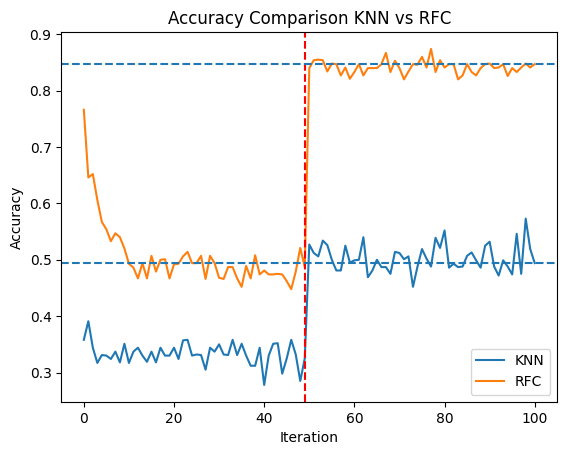

In [8]:
class_changed = 0
i = 0
while True:
    distance_array = []
    for index in range(num_columns-1):
        for second_index in range(150):
            raisin_value = raisin.iloc[second_index, index]
            data_value = data.iloc[second_index, index]
            difference1_value = difference1.iloc[second_index, index]
            delta = raisin_value - data_value
            if delta > 0:
                if data_value + difference1_value > raisin_value:
                    data.iloc[second_index, index] = raisin_value
                else:
                    data.iloc[second_index, index] += difference1_value
            elif delta < 0:
                if data_value - difference1_value < raisin_value:
                    data.iloc[second_index, index] = raisin_value
                else:
                    data.iloc[second_index, index] -= difference1_value
            
            distance = calculate_distance(iris.iloc[second_index, index], raisin.iloc[second_index, index], data.iloc[second_index, index])
            distance_array.append(distance)

    accuracy_overall_knn.append(calculate_stats_knn(data))
    accuracy_overall_mlp.append(calculate_stats_mlp(data))

    if is_average_greater_than_half(distance_array) and class_changed == 0:
        data.iloc[:, -1] = raisin.iloc[:, -1]
        class_changed = i
        print("Target feature changed to Raisin at index:", i)
    print("Iteration:", i, "Distance avg", np.mean(distance_array) )
    #print(distance_array)
    if np.mean(distance_array) == 1:
        print("Converged at iteration:", i)
        break
    i = i + 1


plt.plot(range(len(accuracy_overall_knn)), accuracy_overall_knn, label='MLP')
plt.plot(range(len(accuracy_overall_mlp)), accuracy_overall_mlp, label='RFC')
plt.axvline(x=class_changed, color='red', linestyle='--')
plt.axhline(y=accuracy_overall_knn[-1], linestyle='--')
plt.axhline(y=accuracy_overall_mlp[-1], linestyle='--')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison KNN vs RFC')
plt.legend()
plt.show()

In [9]:
# np.random.seed(137)
# percentage = 0.5
# t = np.linspace(0, 10, data.shape[0])
# for i in range(data.shape[1]-1):
#     n = np.random.normal(0, data[i].std(), t.size) * percentage
#     data[i] = data[i]+ n

In [10]:
# data = iris.copy()
# accuracy_overall = []
# percentage = 0.05
# class_changed = 0
# for i in range(600):
#     distance_array = []
#     for index in range(num_columns-1):
#         for second_index in range(150):
#             #print("Index:", index, "Second Index:", second_index)
#             delta = raisin.iloc[second_index, index] - data.iloc[second_index, index]
#             if delta > 0:
#                 if data.iloc[second_index, index] + (iris.iloc[second_index, index] * percentage) > raisin.iloc[second_index, index]:
#                     data.iloc[second_index, index] = raisin.iloc[second_index, index]
#                 else:
#                     data.iloc[second_index, index] = data.iloc[second_index, index] + (iris.iloc[second_index, index] * percentage)
#             elif delta < 0:
#                 if data.iloc[second_index, index] - (iris.iloc[second_index, index] * percentage) < raisin.iloc[second_index, index]:
#                     data.iloc[second_index, index] = raisin.iloc[second_index, index]
#                 else:
#                     data.iloc[second_index, index] = data.iloc[second_index, index] - (iris.iloc[second_index, index] * percentage)
            
#             distance = calculate_distance(iris.iloc[second_index, index], raisin.iloc[second_index, index], data.iloc[second_index, index])
#             distance_array.append(distance)

#     accuracy_overall.append(calculate_stats_mlp(data))

#     if is_average_greater_than_half(distance_array) and class_changed == 0:
#         data.iloc[:, -1] = raisin.iloc[:, -1]
#         class_changed = i
#         print("Target feature changed to Raisin at index:", i)

#     if np.mean(distance_array) == 1:
#         print("Converged at iteration:", i)
#         print(data)
#         break

# plt.plot(accuracy_overall)
# plt.axvline(x=class_changed, color='red', linestyle='--')
# plt.axhline(y=accuracy_overall[-1], color='green', linestyle='--')
# plt.xlabel('MLPClassifier - Iris -> Raisin')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Overall')
# plt.show()
